In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/adult-census-income/adult.csv


# Task 1

 Visualizing the distribution of categorical or continuous variables in the Adult Census Income Dataset using bar or historgam charts.

## Import Dataset

In [1]:
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

NameError: name 'pd' is not defined

## Preview and Investigate Dataset

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

## Missing Values

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Visualizations

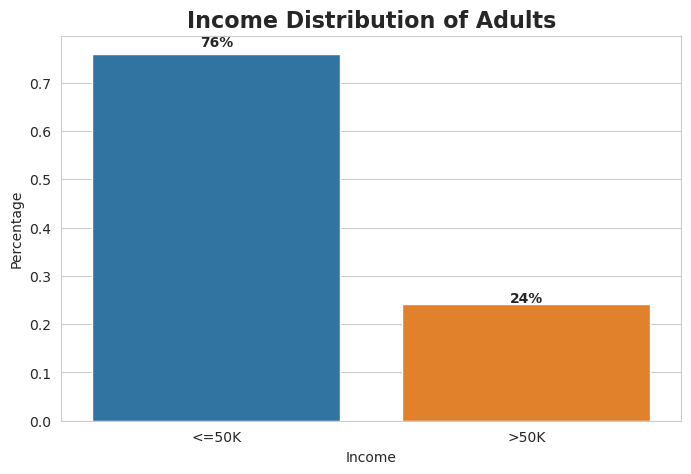

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=16, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage.head(10))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [10]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

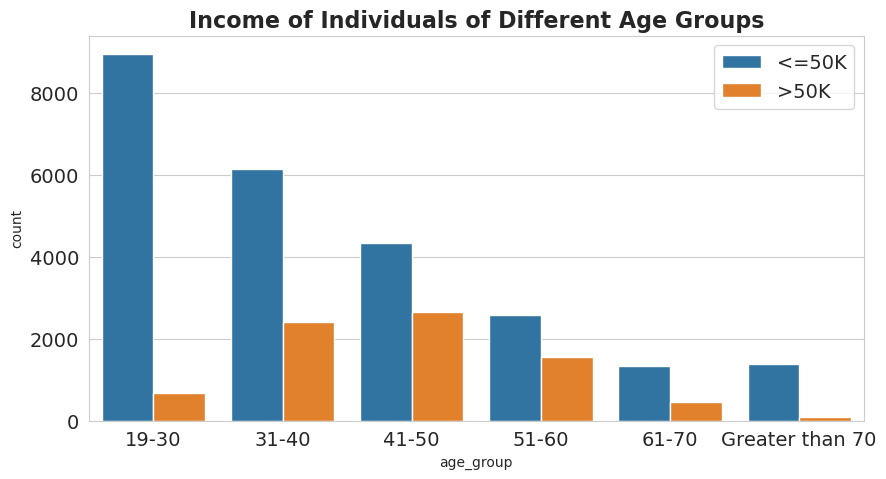

In [11]:
plt.figure(figsize=(10,5))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='age_group', hue='income', data=df, order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)


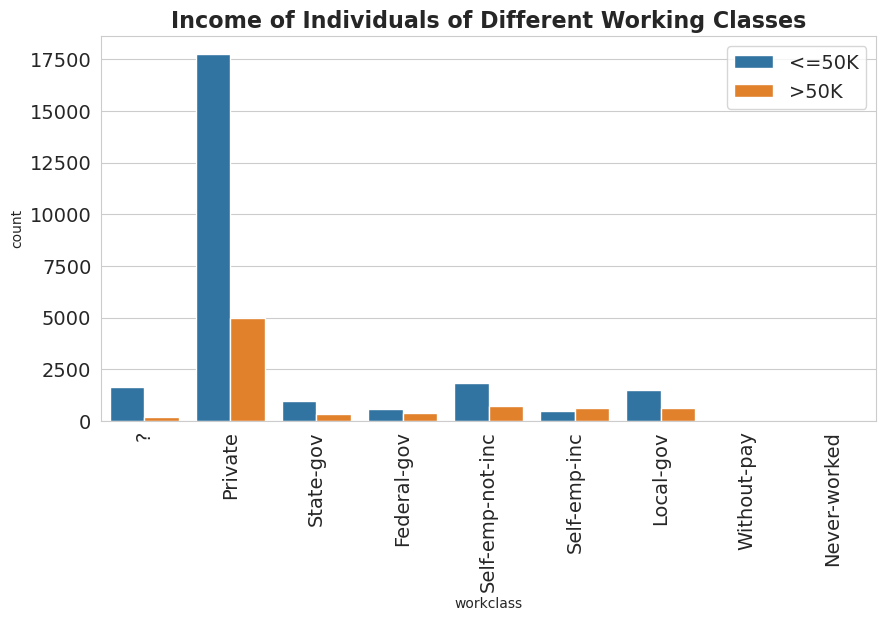

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income of Individuals of Different Working Classes', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

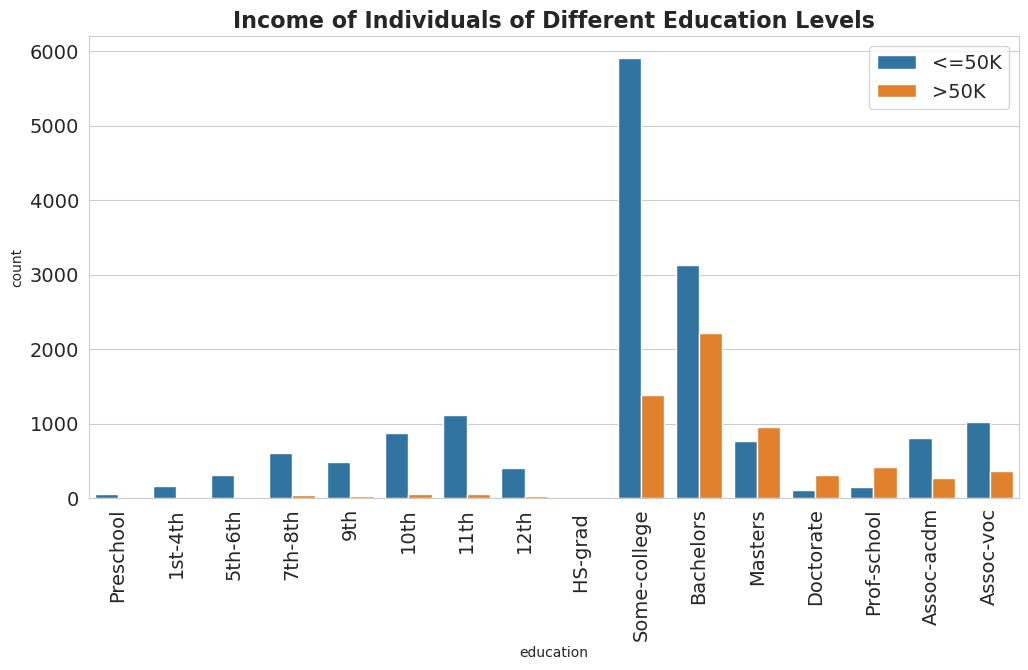

In [13]:
plt.figure(figsize=(12,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x = 'education', hue = 'income', data = df, order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

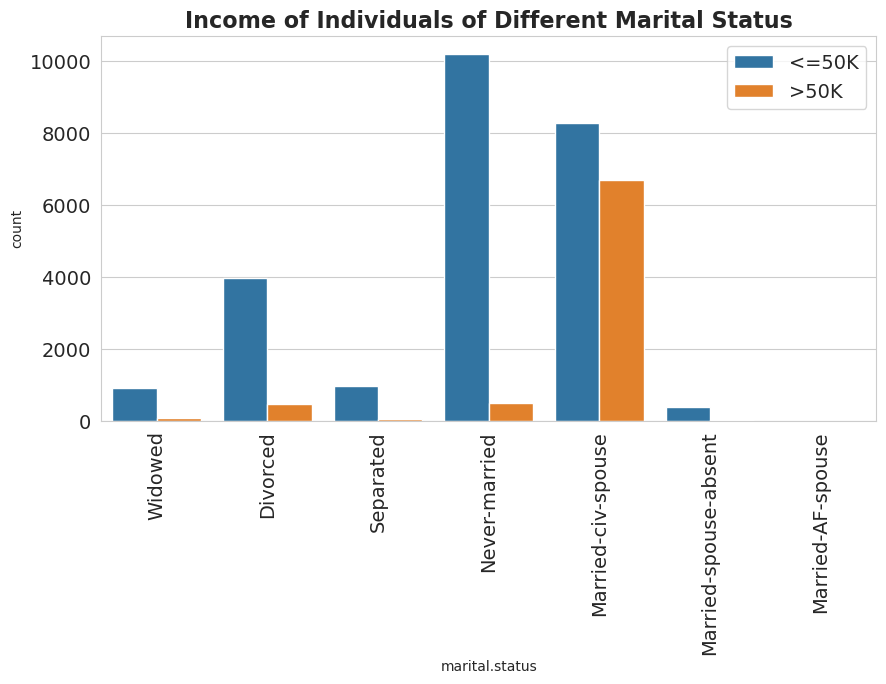

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'marital.status', hue = 'income', data = df)
plt.title('Income of Individuals of Different Marital Status', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

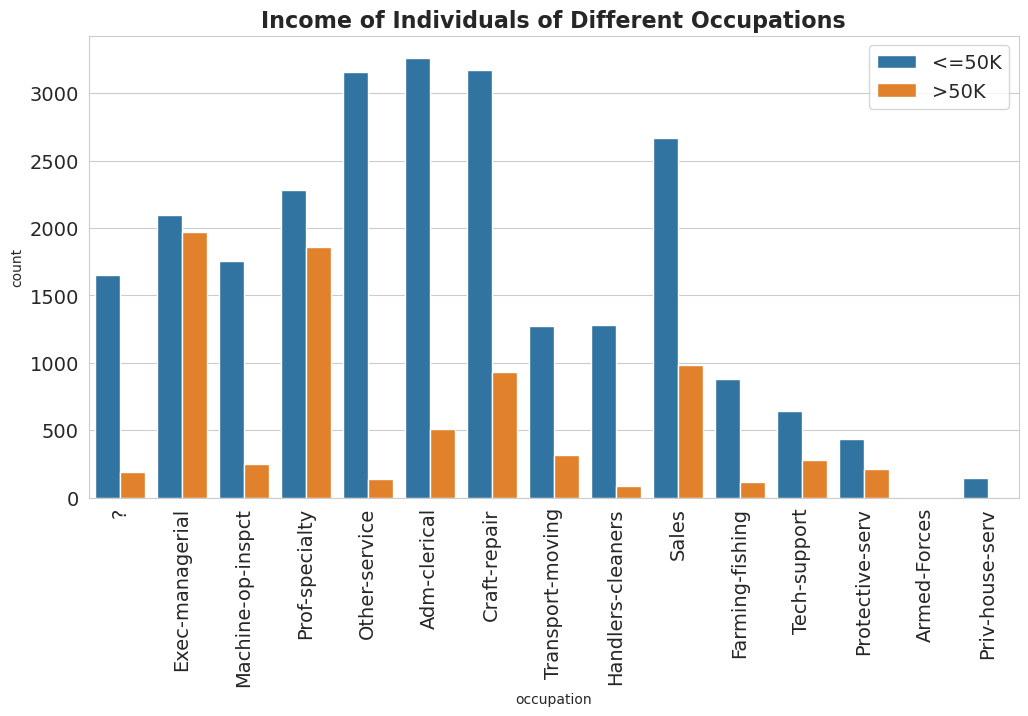

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'occupation', hue = 'income', data = df)
plt.title('Income of Individuals of Different Occupations', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

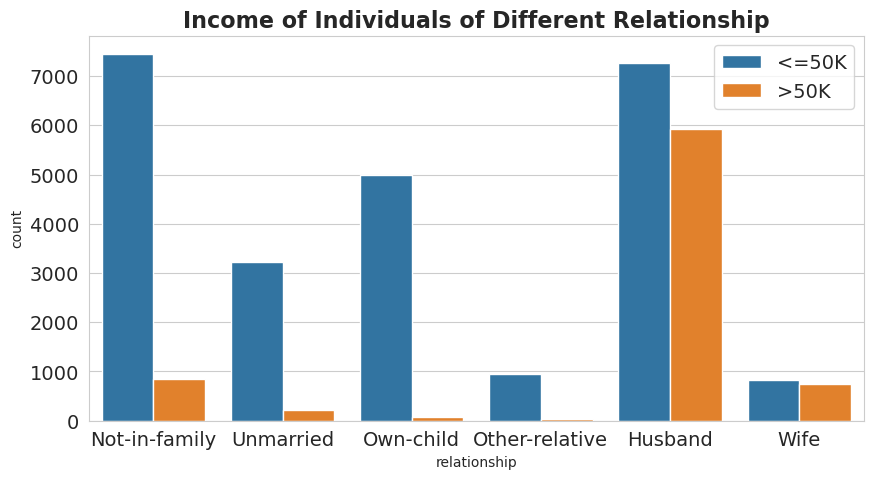

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'relationship', hue = 'income', data = df)
plt.title('Income of Individuals of Different Relationship', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

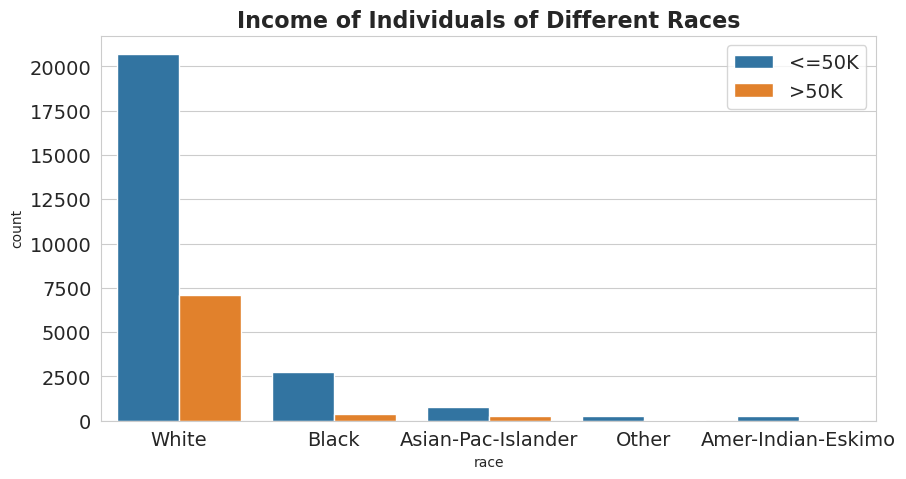

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'race', hue = 'income', data = df)
plt.title('Income of Individuals of Different Races', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

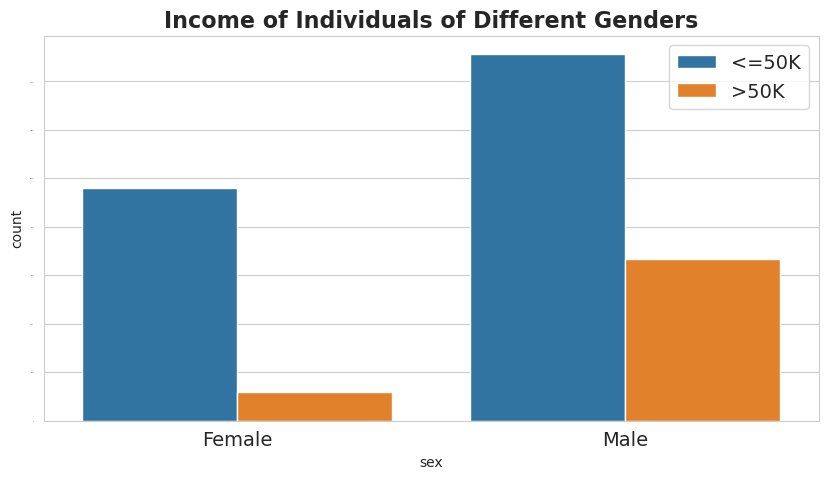

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'sex', hue = 'income', data = df)
plt.title('Income of Individuals of Different Genders', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=1)
plt.legend(fontsize=14)

## Conclusion

In this notebook, we explored the Adult Census Income dataset available on Kaggle and focused on visualizing the distribution of categorical data using histograms. By analyzing the data and creating histograms, we gained valuable insights into the income distribution across different categories.